In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.pandas.get_option('display.max_columns',None)

20

In [3]:
df = pd.read_csv("COVID-19 Coronavirus.csv")

In [4]:
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [5]:
df.shape

(225, 10)

# Missing value

In [6]:
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [7]:
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [8]:
feature_na = []
for feature in df.columns:
    if df[feature].isnull().sum()>=1:
        feature_na.append(feature)

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

Country                    0
Other names                0
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [11]:
#There is no null value

# Numerical Variable

In [38]:
numerical_feature = []
data = df.copy()
for feature in data.columns:
    if data[feature].dtypes != 'O':
        numerical_feature.append(feature)

In [39]:
numerical_feature

['Population',
 'Total Cases',
 'Total Deaths',
 'Tot\xa0Cases//1M pop',
 'Tot\xa0Deaths/1M pop',
 'Death percentage']

In [40]:
# Discreat Variable

In [41]:
Discreat_vaiable = []

In [42]:
for feature in numerical_feature:
    if  data[feature].dtypes == 'int64':
        Discreat_vaiable.append(feature)

In [43]:
Discreat_vaiable

['Population',
 'Total Cases',
 'Total Deaths',
 'Tot\xa0Cases//1M pop',
 'Tot\xa0Deaths/1M pop']

In [44]:
df[Discreat_vaiable]

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop
0,40462186,177827,7671,4395,190
1,2872296,273870,3492,95349,1216
2,45236699,265691,6874,5873,152
3,77481,40024,153,516565,1975
4,34654212,99194,1900,2862,55
...,...,...,...,...,...
220,10894,454,7,41674,643
221,623031,10,1,16,2
222,30975258,11806,2143,381,69
223,19284482,317076,3967,16442,206


In [45]:
for feature in Discreat_vaiable:
    print('the {} have {} unique value'.format(feature,len(data[feature].unique())))

the Population have 224 unique value
the Total Cases have 223 unique value
the Total Deaths have 207 unique value
the Tot Cases//1M pop have 224 unique value
the Tot Deaths/1M pop have 199 unique value


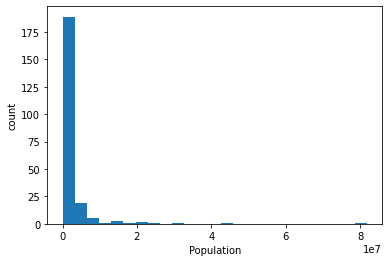

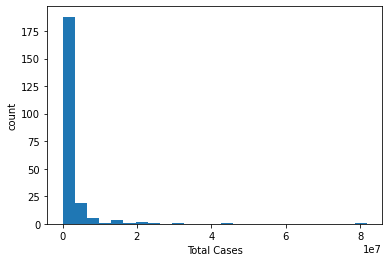

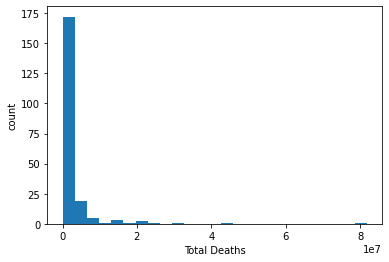

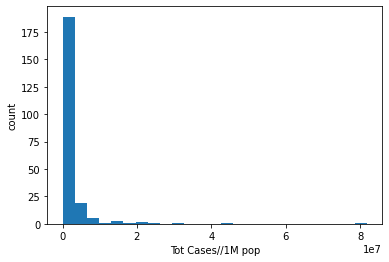

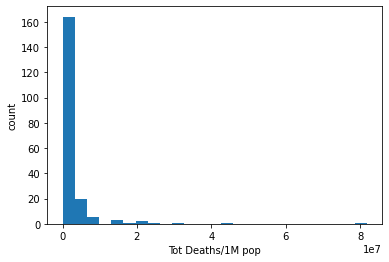

In [46]:
for feature in Discreat_vaiable:
    data.groupby(feature)['Total Cases'].median().plot.hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

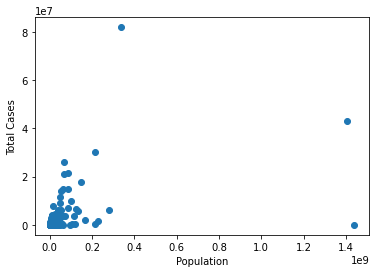

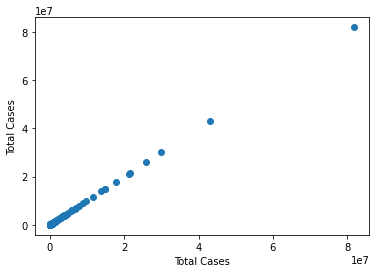

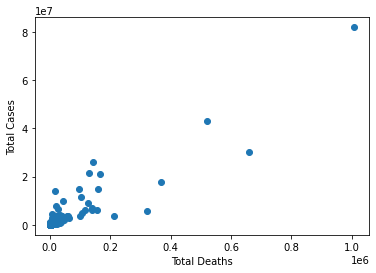

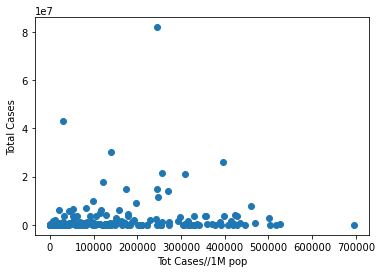

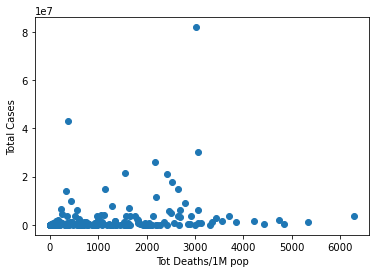

In [47]:
for feature in Discreat_vaiable:
    plt.scatter(x = feature,y = 'Total Cases',data = data)
    plt.xlabel(feature)
    plt.ylabel('Total Cases')
    plt.show()

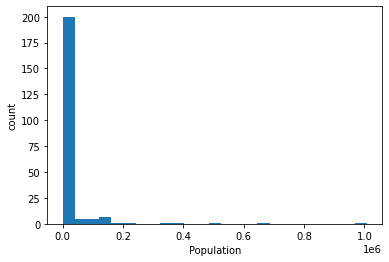

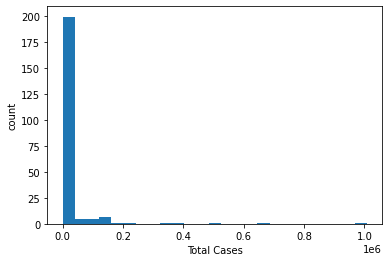

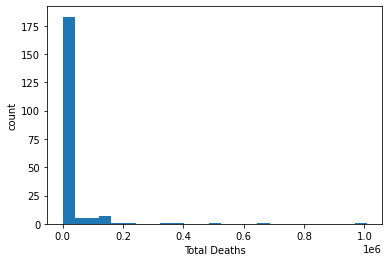

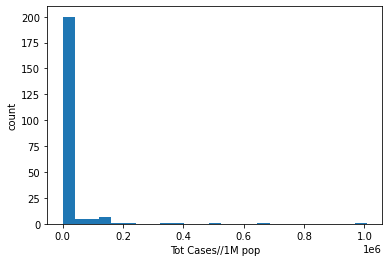

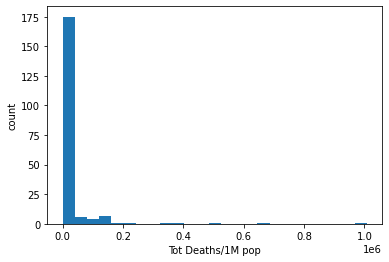

In [48]:
for feature in Discreat_vaiable:
    data.groupby(feature)['Total Deaths'].median().plot.hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

In [49]:
df[Discreat_vaiable].corr()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop
Population,1.000000,0.430518,0.428027,-0.129113,-0.064568
Total Cases,0.430518,1.000000,0.915237,0.130623,0.223170
Total Deaths,0.428027,0.915237,1.000000,0.038645,0.297156
Tot Cases//1M pop,-0.129113,0.130623,0.038645,1.000000,0.500210
Tot Deaths/1M pop,-0.064568,0.223170,0.297156,0.500210,1.000000


In [50]:
#as cases arrises death no inc
#more population more cases
# the graph show pareto distribution 

In [51]:
from scipy import stats

In [52]:
x,y = stats.boxcox(df['Population'])

<AxesSubplot:ylabel='Count'>

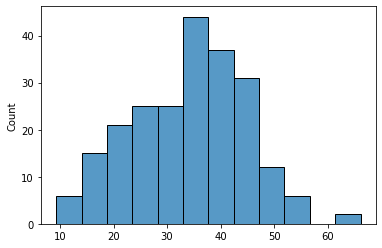

In [53]:
sns.histplot(x)

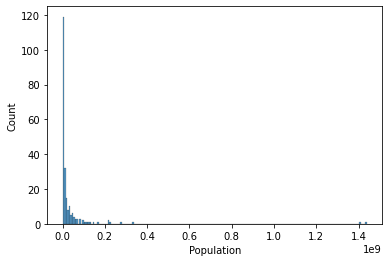

In [54]:
sns.histplot(df['Population'])
data['Population'] = x

In [55]:
#continous feature

In [56]:
continous_variable= []
for feature in numerical_feature:
    if feature not in Discreat_vaiable:
        continous_variable.append(feature)

In [57]:
continous_variable

['Death percentage']

In [58]:
df[continous_variable].head()

,Death percentage
0,4.313743
1,1.275058
2,2.587216
3,0.382271
4,1.915438


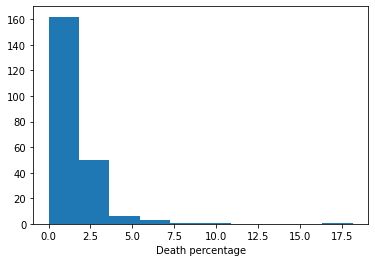

In [59]:
for feature in continous_variable:
    plt.hist(data=data,x = feature)
    plt.xlabel(feature)
    plt.show()

In [60]:
data.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,44.303716,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,32.254599,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,44.880184,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,19.944408,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,43.512817,Africa,99194,1900,2862,55,1.915438


In [61]:
data[Discreat_vaiable]

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop
0,44.303716,177827,7671,4395,190
1,32.254599,273870,3492,95349,1216
2,44.880184,265691,6874,5873,152
3,19.944408,40024,153,516565,1975
4,43.512817,99194,1900,2862,55
...,...,...,...,...,...
220,14.810264,454,7,41674,643
221,26.536694,10,1,16,2
222,42.947073,11806,2143,381,69
223,40.622619,317076,3967,16442,206


In [63]:
df.corr()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
Population,1.000000,0.430518,0.428027,-0.129113,-0.064568,0.083222
Total Cases,0.430518,1.000000,0.915237,0.130623,0.223170,-0.032724
Total Deaths,0.428027,0.915237,1.000000,0.038645,0.297156,0.082446
Tot Cases//1M pop,-0.129113,0.130623,0.038645,1.000000,0.500210,-0.350884
Tot Deaths/1M pop,-0.064568,0.223170,0.297156,0.500210,1.000000,0.064104
Death percentage,0.083222,-0.032724,0.082446,-0.350884,0.064104,1.000000


<AxesSubplot:xlabel='Death percentage', ylabel='Total Cases'>

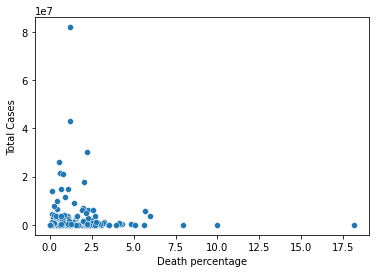

In [64]:
sns.scatterplot(x=df['Death percentage'],y = df['Total Cases'])

#    Categorical variable

In [65]:
categorical_variable = []
for feature in data.columns:
    if data[feature].dtypes == 'O':
        categorical_variable.append(feature)

In [66]:
categorical_variable

['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Continent']

In [67]:
df[categorical_variable]

,Country,Other names,ISO 3166-1 alpha-3 CODE,Continent
0,Afghanistan,Afghanistan,AFG,Asia
1,Albania,Albania,ALB,Europe
2,Algeria,Algeria,DZA,Africa
3,Andorra,Andorra,AND,Europe
4,Angola,Angola,AGO,Africa
...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,Oceania
221,Western Sahara,Western Sahara,ESHÂ,Africa
222,Yemen,Yemen,YEM,Asia
223,Zambia,Zambia,ZMB,Africa


In [68]:
for feature in categorical_variable:
    print("the {} have thia {} unique feature".format(feature,len(df[feature].unique())))

the Country have thia 224 unique feature
the Other names have thia 224 unique feature
the ISO 3166-1 alpha-3 CODE have thia 224 unique feature
the Continent have thia 6 unique feature


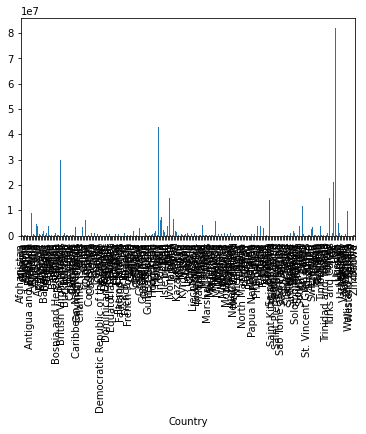

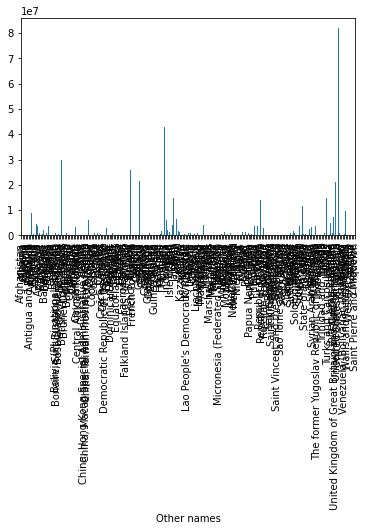

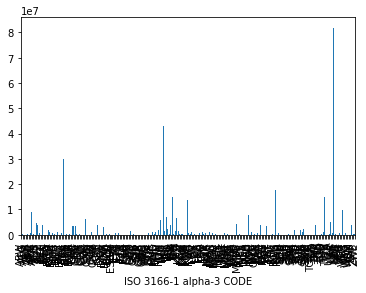

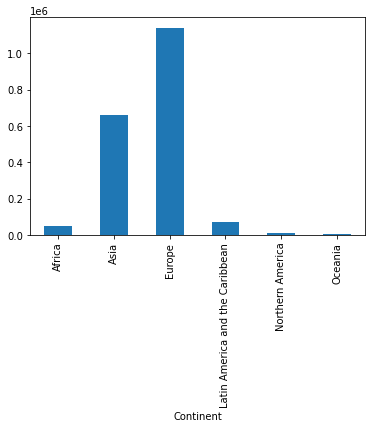

In [70]:
for feature in categorical_variable:
    data.groupby(feature)['Total Cases'].median().plot.bar()
    plt.show()

In [71]:
# this graph show more cases are found in europe

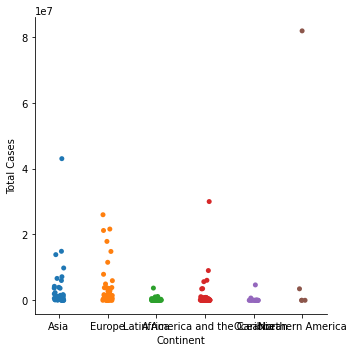

In [73]:
sns.catplot(x = 'Continent',y='Total Cases',data = data)

<AxesSubplot:xlabel='Continent', ylabel='Total Cases'>

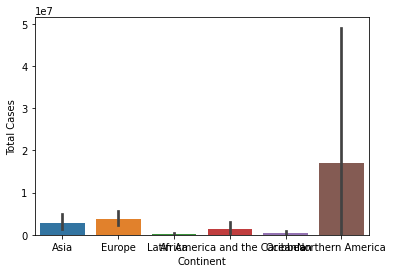

In [74]:
sns.barplot(x='Continent',y='Total Cases',data = data)

In [75]:
df['Continent'].value_counts()

Africa                             58
Asia                               49
Latin America and the Caribbean    48
Europe                             47
Oceania                            17
Northern America                    5
Name: Continent, dtype: int64

<AxesSubplot:xlabel='Continent'>

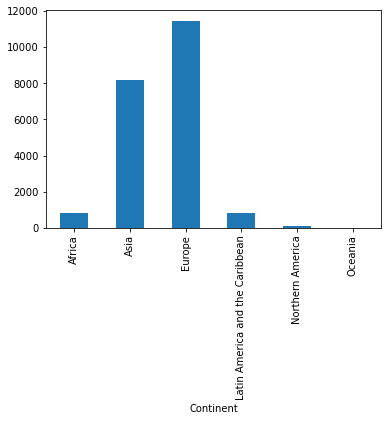

In [86]:
data.groupby('Continent')['Total Deaths'].median().plot.bar()

<AxesSubplot:xlabel='Continent'>

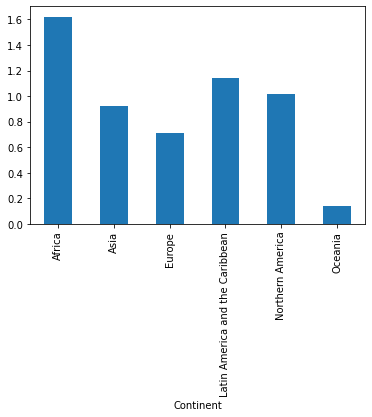

In [87]:
data.groupby('Continent')['Death percentage'].median().plot.bar()

In [88]:
data.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,44.303716,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,32.254599,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,44.880184,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,19.944408,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,43.512817,Africa,99194,1900,2862,55,1.915438


<AxesSubplot:xlabel='Country'>

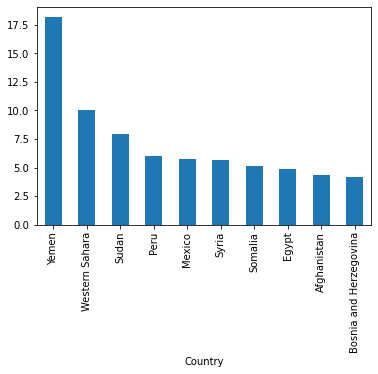

In [90]:
data.groupby('Country')['Death percentage'].median().nlargest(10).plot.bar()

<AxesSubplot:xlabel='Country'>

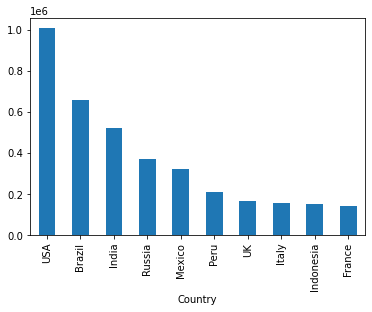

In [91]:
data.groupby('Country')['Total Deaths'].median().nlargest(10).plot.bar()

<AxesSubplot:xlabel='Country'>

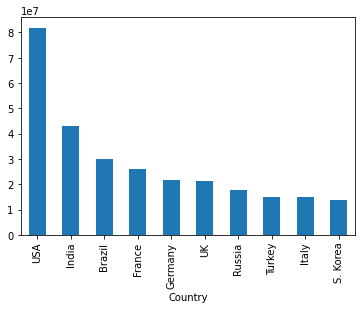

In [92]:
data.groupby('Country')['Total Cases'].median().nlargest(10).plot.bar()

# Observation

1. Top 10 country where total cases are high in [USA,India,Brazil,France,Germany,UK,Russia,Turkey,Itlay,S.korea]
2. Europe Continent has high total cases
3. Africa vcontinent has high death percentage
4. Total death are high in europe
5. Cases are depend upon population 